In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data=pd.read_csv('/content/haberman (1).data',header=None)
data.head()

0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1

In [19]:
data.columns=['X1','X2','X3','Y']
data

X1  X2  X3  Y
0    30  64   1  1
1    30  62   3  1
2    30  65   0  1
3    31  59   2  1
4    31  65   4  1
..   ..  ..  .. ..
301  75  62   1  1
302  76  67   0  1
303  77  65   3  1
304  78  65   1  2
305  83  58   2  2

[306 rows x 4 columns]

In [20]:
X=data.drop('Y',axis=1)
Y=data['Y']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [22]:
X

array([[-2.08214014e+00,  3.53584065e-01, -4.21592031e-01],
       [-2.08214014e+00, -2.62921484e-01, -1.42958853e-01],
       [-2.08214014e+00,  6.61836839e-01, -5.60908620e-01],
       [-1.98942552e+00, -1.18767981e+00, -2.82275442e-01],
       [-1.98942552e+00,  6.61836839e-01, -3.64226377e-03],
       [-1.80399628e+00, -1.49593258e+00,  8.32257270e-01],
       [-1.80399628e+00, -8.79427033e-01, -5.60908620e-01],
       [-1.71128165e+00, -1.18767981e+00, -5.60908620e-01],
       [-1.71128165e+00,  9.70089614e-01,  6.92940681e-01],
       [-1.71128165e+00, -1.49593258e+00,  3.61858905e+00],
       [-1.71128165e+00, -8.79427033e-01, -4.21592031e-01],
       [-1.71128165e+00, -5.71174259e-01,  8.32257270e-01],
       [-1.71128165e+00,  1.27834239e+00,  4.14307503e-01],
       [-1.71128165e+00, -8.79427033e-01, -5.60908620e-01],
       [-1.61856703e+00,  3.53584065e-01,  1.25020704e+00],
       [-1.61856703e+00,  4.53312904e-02, -5.60908620e-01],
       [-1.52585241e+00, -8.79427033e-01

In [23]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: Y, Length: 306, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [25]:
l1accu=[]
l2accu=[]

$ \huge{3.}$ \
The accuracies are reported below:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=49)
for K in range(5):
  K_value = K+1
  neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto',metric='l1')
  neigh.fit(X_train, y_train) 
  y_pred = neigh.predict(X_test)
  val=accuracy_score(y_test,y_pred)*100
  print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
  # print(type(val))
  l1accu.append(val)

Accuracy is  74.19354838709677 % for K-Value: 1
Accuracy is  74.19354838709677 % for K-Value: 2
Accuracy is  69.35483870967742 % for K-Value: 3
Accuracy is  72.58064516129032 % for K-Value: 4
Accuracy is  64.51612903225806 % for K-Value: 5


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=49)
for K in range(5):
  K_value = K+1
  neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto',metric='l2')
  neigh.fit(X_train, y_train) 
  y_pred = neigh.predict(X_test)
  print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
  l2accu.append(accuracy_score(y_test,y_pred)*100)

Accuracy is  72.58064516129032 % for K-Value: 1
Accuracy is  77.41935483870968 % for K-Value: 2
Accuracy is  72.58064516129032 % for K-Value: 3
Accuracy is  75.80645161290323 % for K-Value: 4
Accuracy is  72.58064516129032 % for K-Value: 5


In [28]:
kvals=[1,2,3,4,5]
l2accu

[72.58064516129032,
 77.41935483870968,
 72.58064516129032,
 75.80645161290323,
 72.58064516129032]

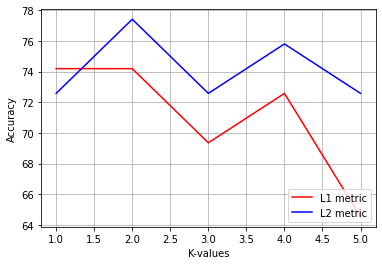

In [29]:
plt.plot(kvals,l1accu,color='red')
plt.plot(kvals,l2accu,color='blue')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.legend(['L1 metric','L2 metric'],loc='lower right')
plt.grid()
plt.show()

$ \huge{4.}$ \
The code is implemented below:

In [30]:
sizes=[0.4,0.3,0.1]
mtr=['l1','l2']
l1accu=[]
l2accu=[]
for size in sizes:
  l1s=[]
  l2s=[]
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=49)
  for K in range(5):
    K_value = K+1
    for pen in mtr:
      neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto',metric=pen)
      neigh.fit(X_train, y_train) 
      y_pred = neigh.predict(X_test)
      print(pen,'metric:')
      print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
      print('\n')
      if pen=='l1':
        l1s.append(accuracy_score(y_test,y_pred)*100)
      else:
        l2s.append(accuracy_score(y_test,y_pred)*100)
  l1accu.append(l1s)
  l2accu.append(l2s)

l1 metric:
Accuracy is  71.54471544715447 % for K-Value: 1


l2 metric:
Accuracy is  69.10569105691057 % for K-Value: 1


l1 metric:
Accuracy is  75.60975609756098 % for K-Value: 2


l2 metric:
Accuracy is  78.04878048780488 % for K-Value: 2


l1 metric:
Accuracy is  69.91869918699187 % for K-Value: 3


l2 metric:
Accuracy is  69.91869918699187 % for K-Value: 3


l1 metric:
Accuracy is  74.79674796747967 % for K-Value: 4


l2 metric:
Accuracy is  75.60975609756098 % for K-Value: 4


l1 metric:
Accuracy is  67.47967479674797 % for K-Value: 5


l2 metric:
Accuracy is  69.10569105691057 % for K-Value: 5


l1 metric:
Accuracy is  68.47826086956522 % for K-Value: 1


l2 metric:
Accuracy is  65.21739130434783 % for K-Value: 1


l1 metric:
Accuracy is  75.0 % for K-Value: 2


l2 metric:
Accuracy is  76.08695652173914 % for K-Value: 2


l1 metric:
Accuracy is  69.56521739130434 % for K-Value: 3


l2 metric:
Accuracy is  68.47826086956522 % for K-Value: 3


l1 metric:
Accuracy is  73.9130434782

Plot the graph between k(Number of Clusters) vs test − accuracy for all the different training and test data
splits.

In [31]:
l1accu

[[71.54471544715447,
  75.60975609756098,
  69.91869918699187,
  74.79674796747967,
  67.47967479674797],
 [68.47826086956522,
  75.0,
  69.56521739130434,
  73.91304347826086,
  64.13043478260869],
 [80.64516129032258,
  80.64516129032258,
  80.64516129032258,
  83.87096774193549,
  74.19354838709677]]

In [32]:
l2accu

[[69.10569105691057,
  78.04878048780488,
  69.91869918699187,
  75.60975609756098,
  69.10569105691057],
 [65.21739130434783,
  76.08695652173914,
  68.47826086956522,
  71.73913043478261,
  70.65217391304348],
 [80.64516129032258,
  83.87096774193549,
  80.64516129032258,
  87.09677419354838,
  80.64516129032258]]

$ \huge{5.}$ \
The graphs are plotted below:

For split of 0.4


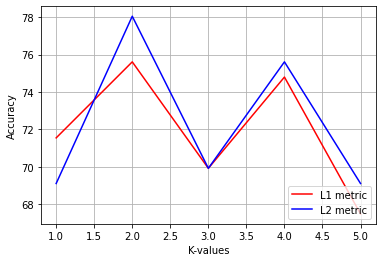

For split of 0.3


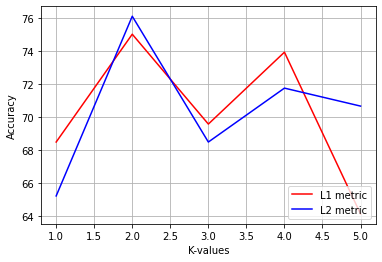

For split of 0.1


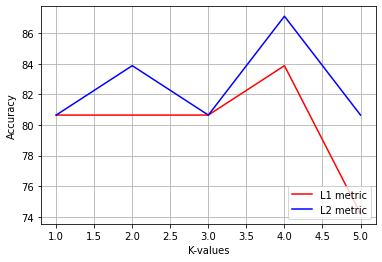

In [33]:
for n in range(3):
  print('For split of',sizes[n])
  plt.plot(kvals,l1accu[n],color='red')
  plt.plot(kvals,l2accu[n],color='blue')
  plt.grid()
  plt.xlabel('K-values')
  plt.ylabel('Accuracy')
  plt.legend(['L1 metric','L2 metric'],loc='lower right')
  plt.show()